In [42]:
import pandas as pd
pd.set_option('display.max_columns', 600)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.3)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics

In [2]:
clinical = pd.read_csv('./data.csv')
mrna = pd.read_csv('./mRNA.csv')
mrna['Unnamed: 0'] = mrna['Unnamed: 0'].apply(lambda x: '.'.join(x.split('-')[0:4]))
mrna.index = mrna['Unnamed: 0']
mrna = mrna.drop('Unnamed: 0', axis=1)
clinical = clinical[['BRAF', 'name', 'multifocality']]
clinical2 = pd.merge(clinical, mrna, left_on='name', right_index=True)

clinical2 = clinical2.dropna(axis=0)
clinical2 = clinical2[clinical2['BRAF_x'] == 1]

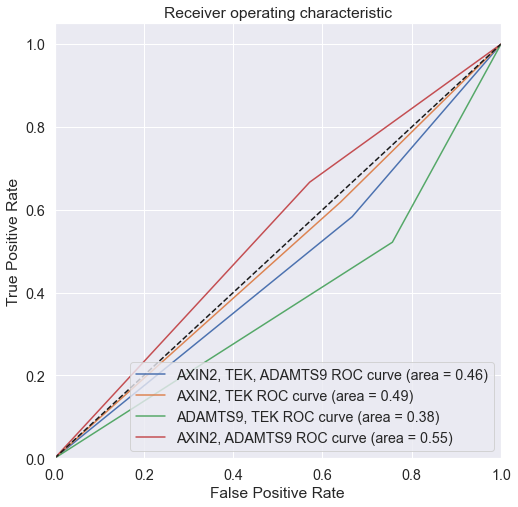

In [100]:
np.random.seed(12345)

X = clinical2[['AXIN2', 'TEK', 'ADAMTS9']]
Y = clinical2['multifocality'] == 'multifocal'

X_train, X_test, y_train, y_test = train_test_split(X,Y)

dt_clf = DecisionTreeClassifier(criterion = "entropy", max_depth = 5)
dt_clf = dt_clf.fit(X_train, y_train)
dt_prediction = dt_clf.predict(X_test)
###########################################################
plt.figure(figsize=(8,8))

y = dt_prediction
scores = dt_prediction == y_test

fpr, tpr, thresholds = metrics.roc_curve(y, scores)
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, label='AXIN2, TEK, ADAMTS9 ROC curve (area = %0.2f)' % roc_auc)
###########################################################
X = clinical2[['AXIN2', 'TEK']]
Y = clinical2['multifocality'] == 'multifocal'

X_train, X_test, y_train, y_test = train_test_split(X,Y)

dt_clf = DecisionTreeClassifier(criterion = "entropy", max_depth = 5)
dt_clf = dt_clf.fit(X_train, y_train)
dt_prediction = dt_clf.predict(X_test)
###########################################################
y = dt_prediction
scores = dt_prediction == y_test

fpr, tpr, thresholds = metrics.roc_curve(y, scores)
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, label='AXIN2, TEK ROC curve (area = %0.2f)' % roc_auc)
###########################################################
X = clinical2[['ADAMTS9', 'TEK']]
Y = clinical2['multifocality'] == 'multifocal'

X_train, X_test, y_train, y_test = train_test_split(X,Y)

dt_clf = DecisionTreeClassifier(criterion = "entropy", max_depth = 5)
dt_clf = dt_clf.fit(X_train, y_train)
dt_prediction = dt_clf.predict(X_test)
###########################################################
y = dt_prediction
scores = dt_prediction == y_test

fpr, tpr, thresholds = metrics.roc_curve(y, scores)
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, label='ADAMTS9, TEK ROC curve (area = %0.2f)' % roc_auc)
###########################################################
X = clinical2[['AXIN2', 'ADAMTS9']]
Y = clinical2['multifocality'] == 'multifocal'

X_train, X_test, y_train, y_test = train_test_split(X,Y)

dt_clf = DecisionTreeClassifier(criterion = "entropy", max_depth = 5)
dt_clf = dt_clf.fit(X_train, y_train)
dt_prediction = dt_clf.predict(X_test)
###########################################################
y = dt_prediction
scores = dt_prediction == y_test

fpr, tpr, thresholds = metrics.roc_curve(y, scores)
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, label='AXIN2, ADAMTS9 ROC curve (area = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.savefig('./DecisionTree_ROC.png', dpi=300, bbox_inches='tight')